<a href="https://colab.research.google.com/github/Sumit-Nayek/Introduction-to-ML/blob/main/BigMart_Sales_Prediction_Supervised_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
big_mart_data=pd.read_csv('/content/Train.csv')
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
###What is the distribution of numerical feature values across the samples?
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
big_mart_data.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


<ipython-input-6-39a17f82fbe9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


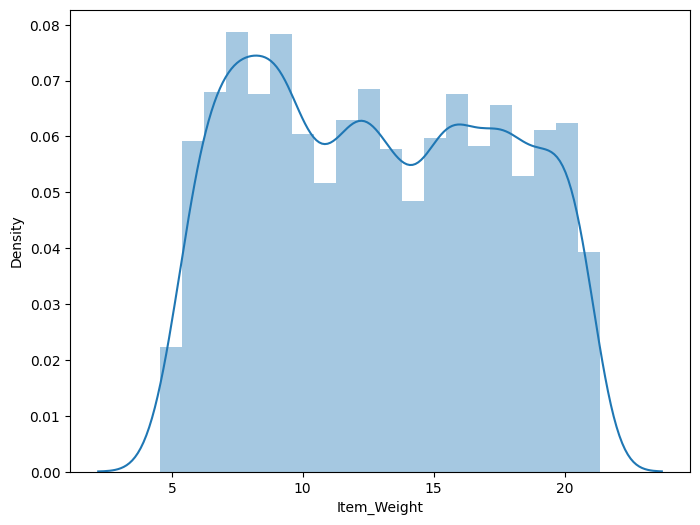

<ipython-input-6-39a17f82fbe9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


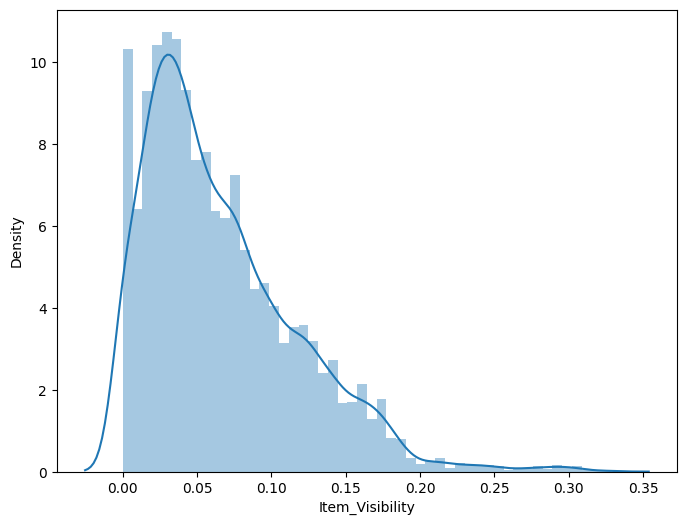

<ipython-input-6-39a17f82fbe9>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


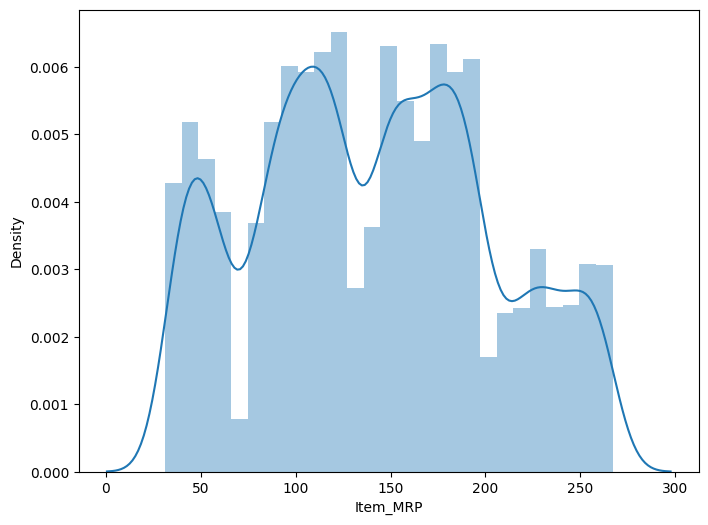

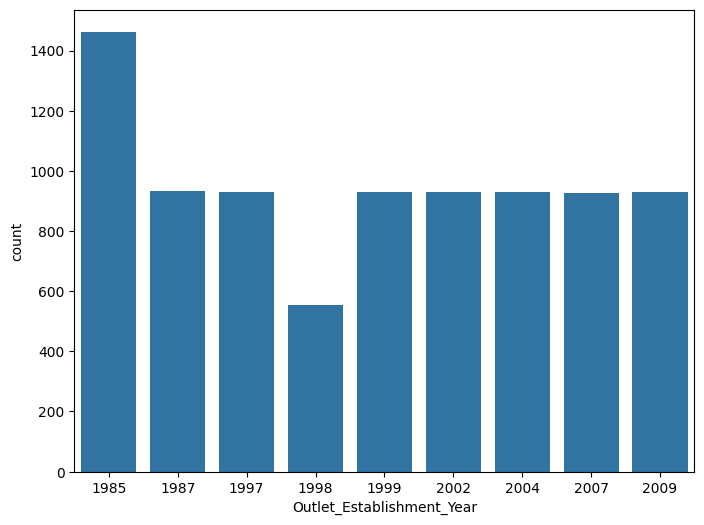

<ipython-input-6-39a17f82fbe9>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


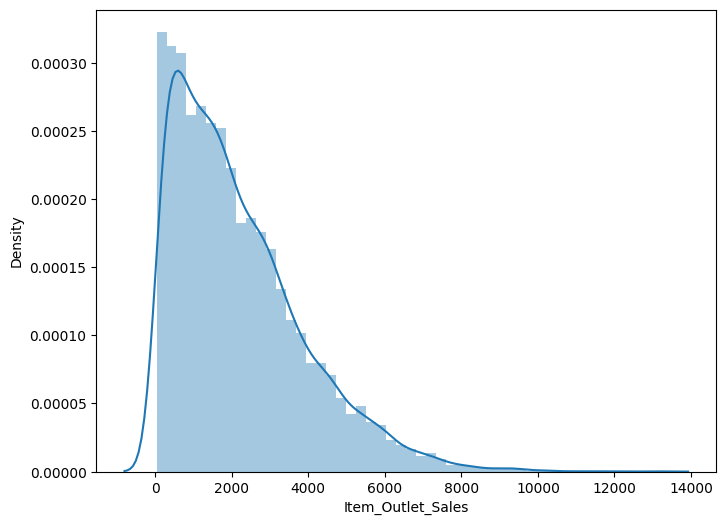

In [ ]:
# prompt: Apply some data visualization one by one Univariate study

import matplotlib.pyplot as plt
import seaborn as sns

# Item_Weight
plt.figure(figsize=(8,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

# Item_Visibility
plt.figure(figsize=(8,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

# Item_MRP
plt.figure(figsize=(8,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

# Outlet_Establishment_Year
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

# Item_Outlet_Sales
plt.figure(figsize=(8,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()


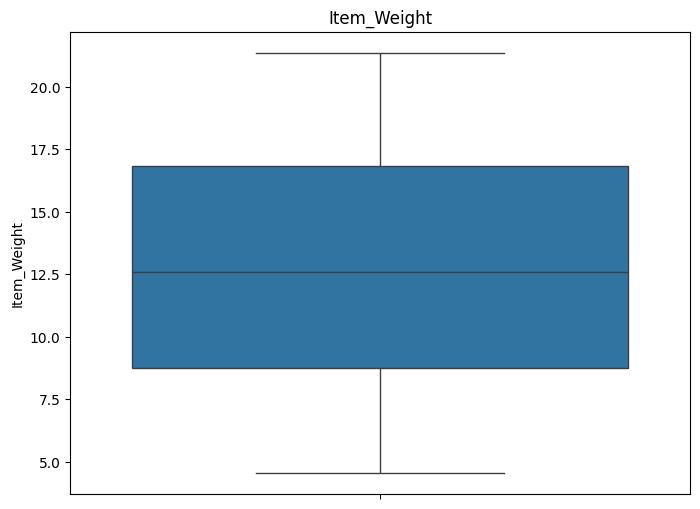

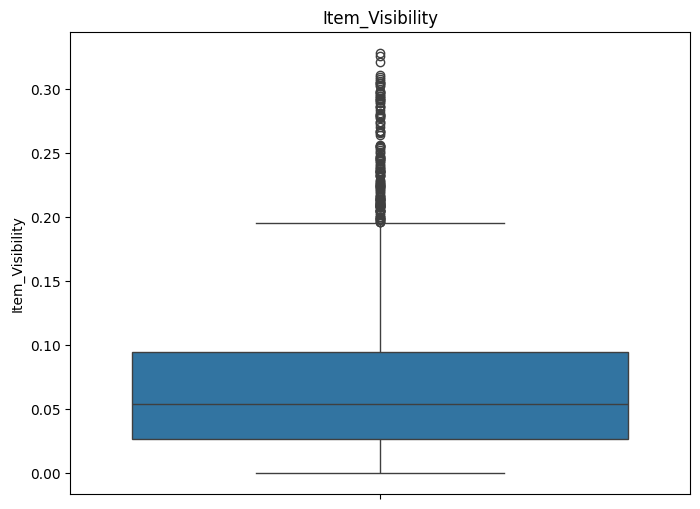

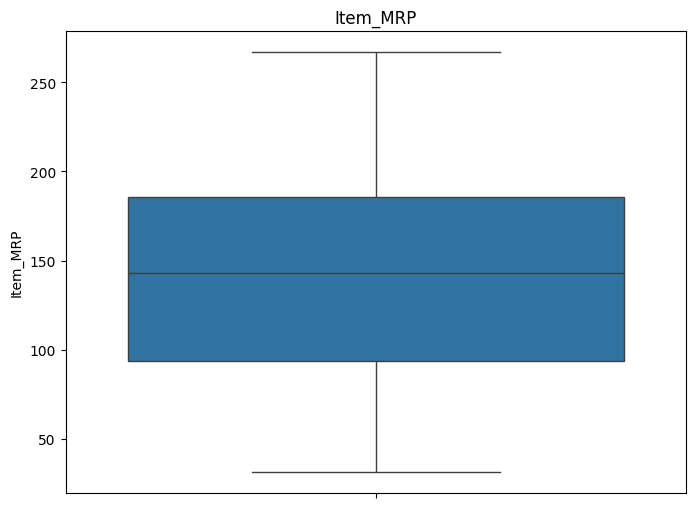

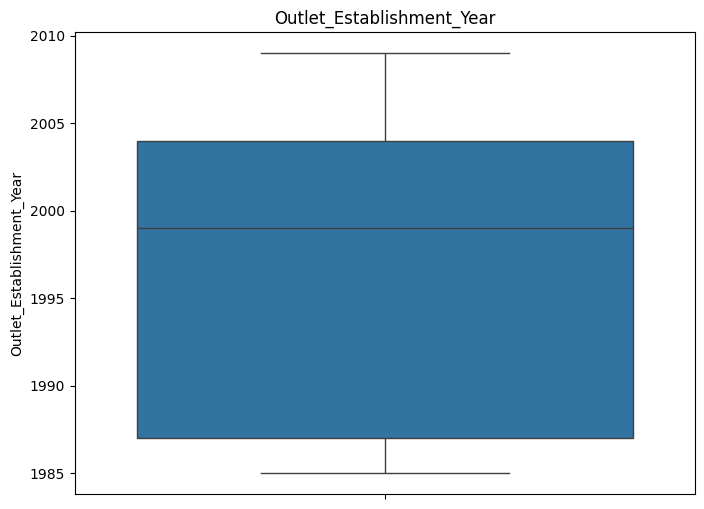

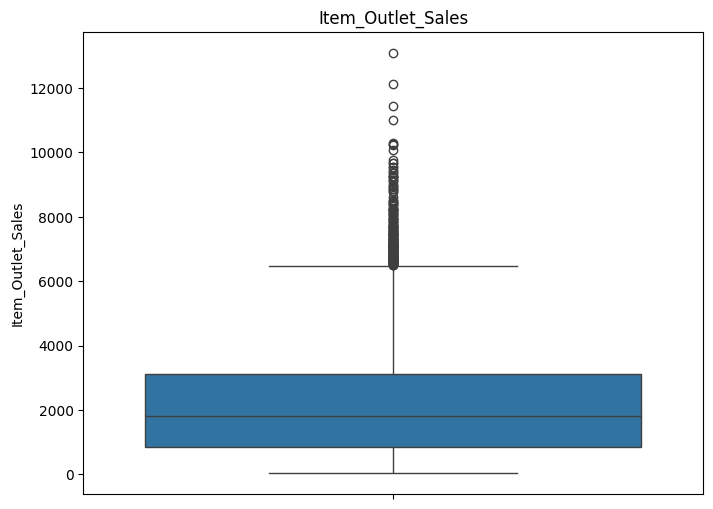

In [ ]:
# prompt: Visualize the outlier in univariate study using a loop

import matplotlib.pyplot as plt
numerical_features = [feature for feature in big_mart_data.columns if big_mart_data[feature].dtype != 'O']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(y=big_mart_data[feature])
    plt.title(feature)
    plt.show()


In [ ]:
# prompt: Remove outlier from the data

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage for 'Item_Outlet_Sales'
big_mart_data_no_outliers = remove_outliers_iqr(big_mart_data, 'Item_Outlet_Sales')

# You can apply this function to other numerical columns as needed.
# For example:
# big_mart_data_no_outliers = remove_outliers_iqr(big_mart_data_no_outliers, 'Item_MRP')

# Verify the changes (optional)
print(f"Original shape: {big_mart_data.shape}")
print(f"Shape after outlier removal: {big_mart_data_no_outliers.shape}")


Original shape: (8523, 12)
Shape after outlier removal: (8337, 12)


In [ ]:
# prompt: Apply Different missing value treatment

# Fill missing values in 'Item_Weight' with the mean
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

# Fill missing values in 'Outlet_Size' with the mode
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0], inplace=True)
big_mart_data.isnull().sum()

<ipython-input-13-107fc80984f3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


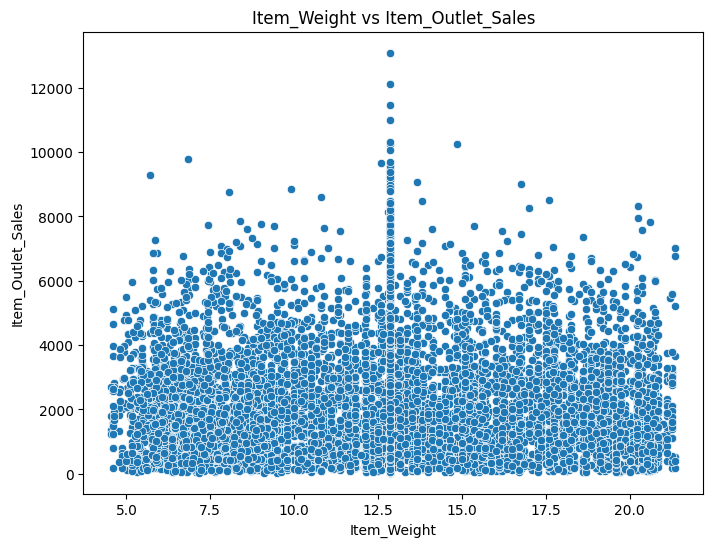

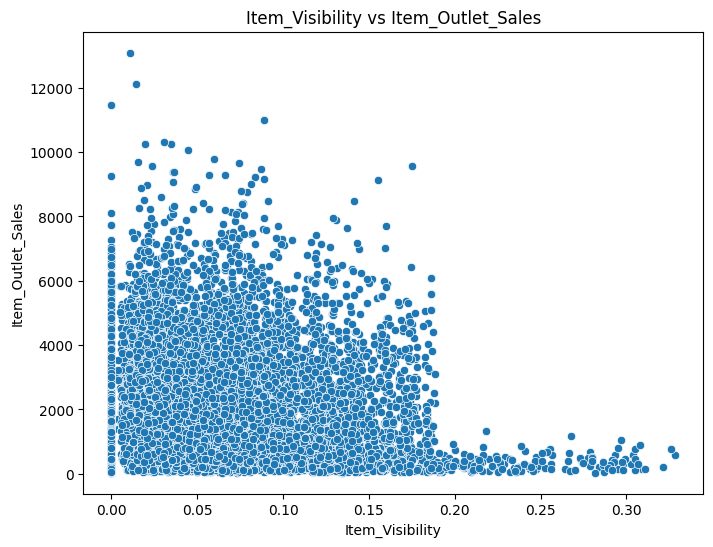

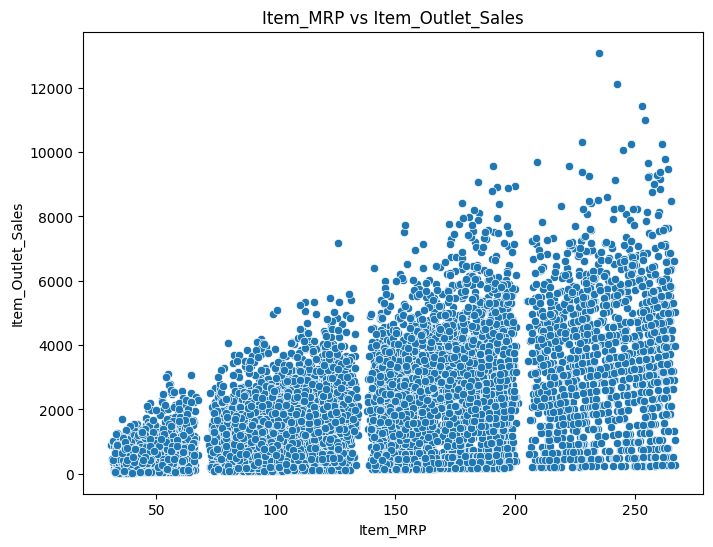

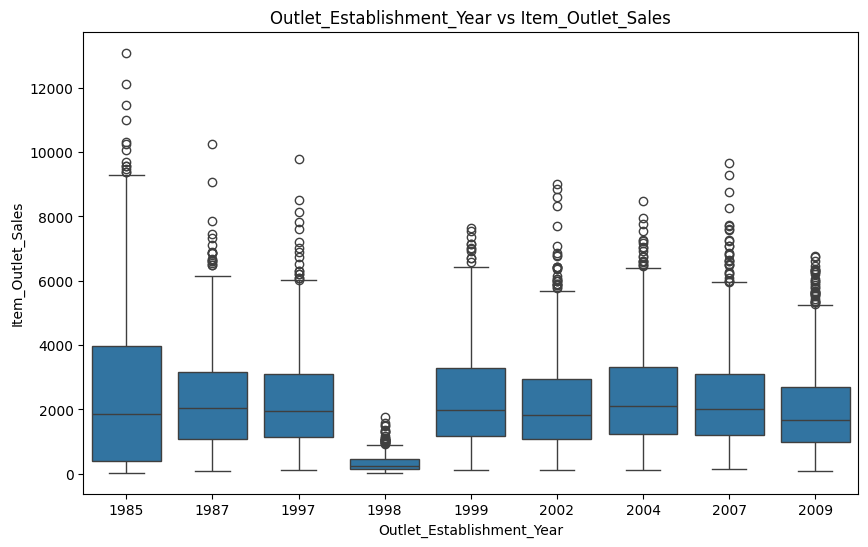

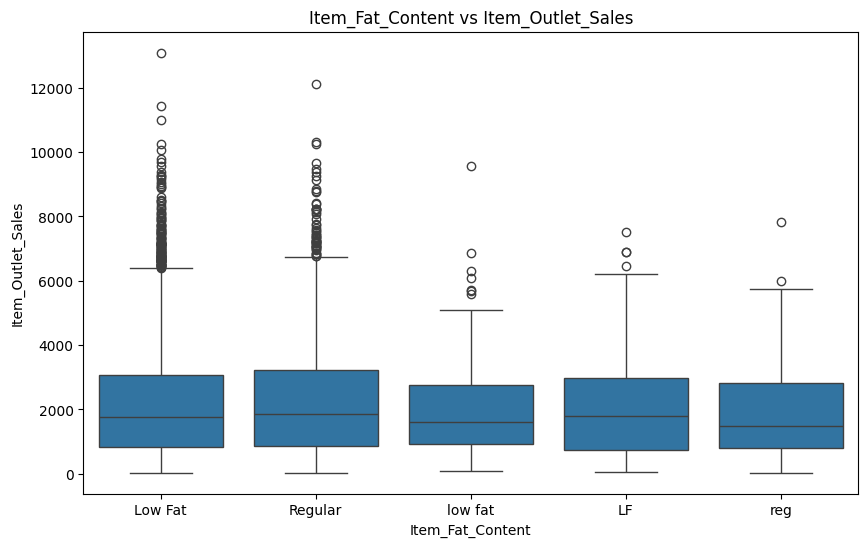

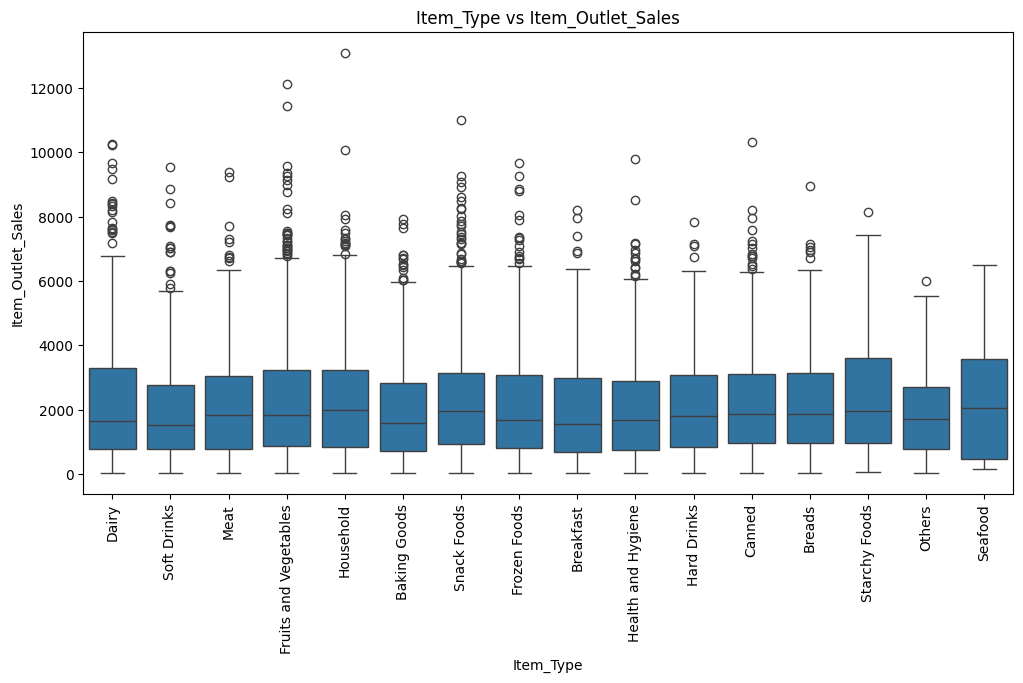

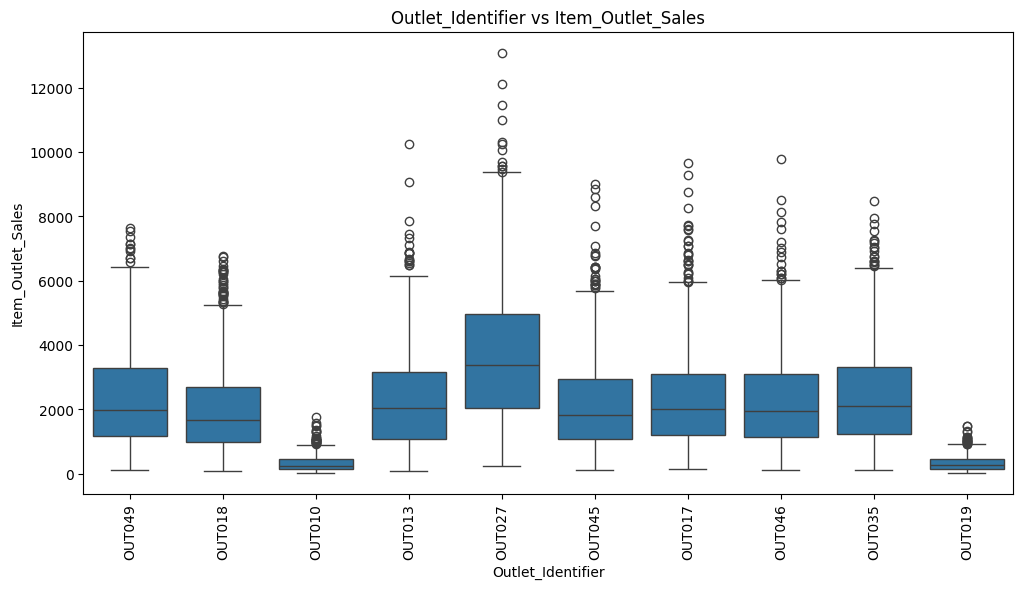

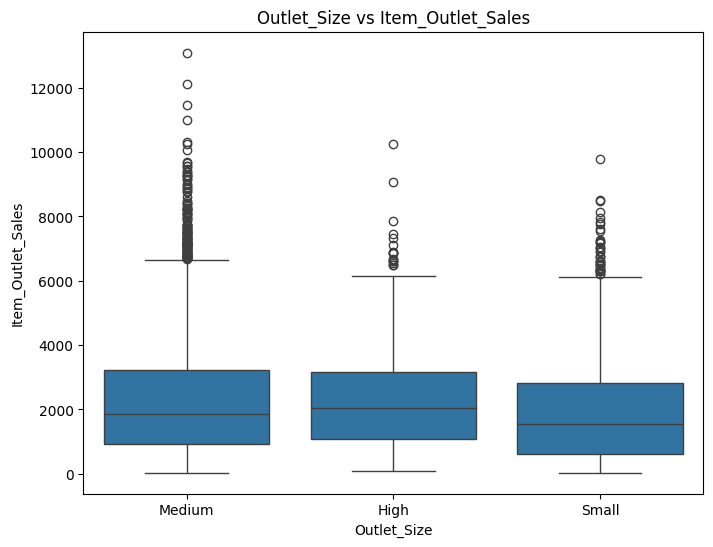

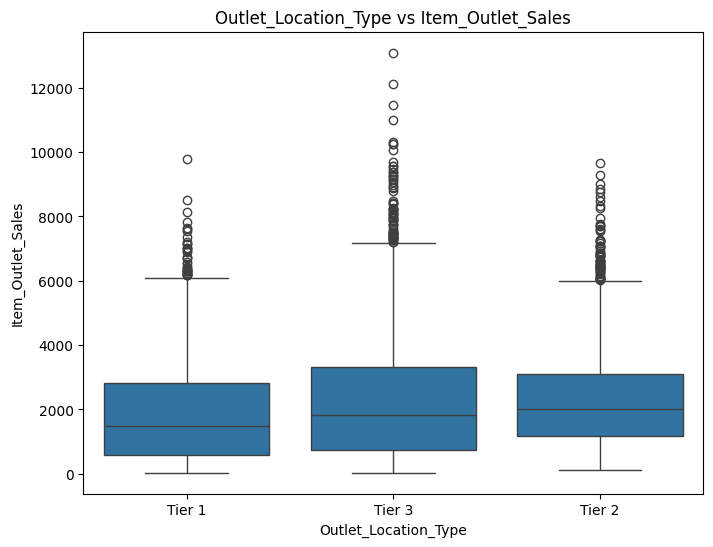

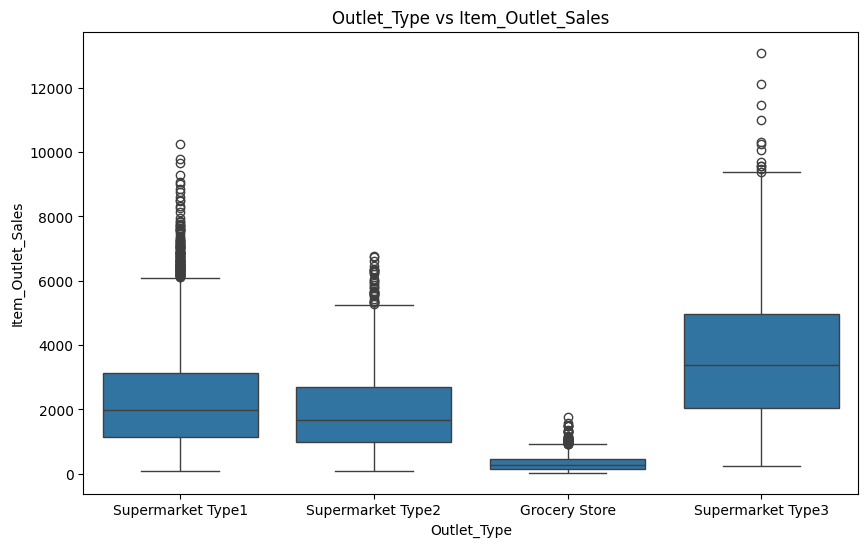

In [ ]:
# prompt: Apply some data visualization one by one Bivariate study]

import matplotlib.pyplot as plt
# Bivariate Analysis

# Item_Weight vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Item_Weight vs Item_Outlet_Sales')
plt.show()

# Item_Visibility vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Item_Visibility vs Item_Outlet_Sales')
plt.show()

# Item_MRP vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()

# Outlet_Establishment_Year vs Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.show()

# Item_Fat_Content vs Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.show()

# Item_Type vs Item_Outlet_Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=big_mart_data)
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.show()

# Outlet_Identifier vs Item_Outlet_Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=big_mart_data)
plt.xticks(rotation=90)
plt.title('Outlet_Identifier vs Item_Outlet_Sales')
plt.show()

# Outlet_Size vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Outlet_Size vs Item_Outlet_Sales')
plt.show()

# Outlet_Location_Type vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Outlet_Location_Type vs Item_Outlet_Sales')
plt.show()

# Outlet_Type vs Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart_data)
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.show()


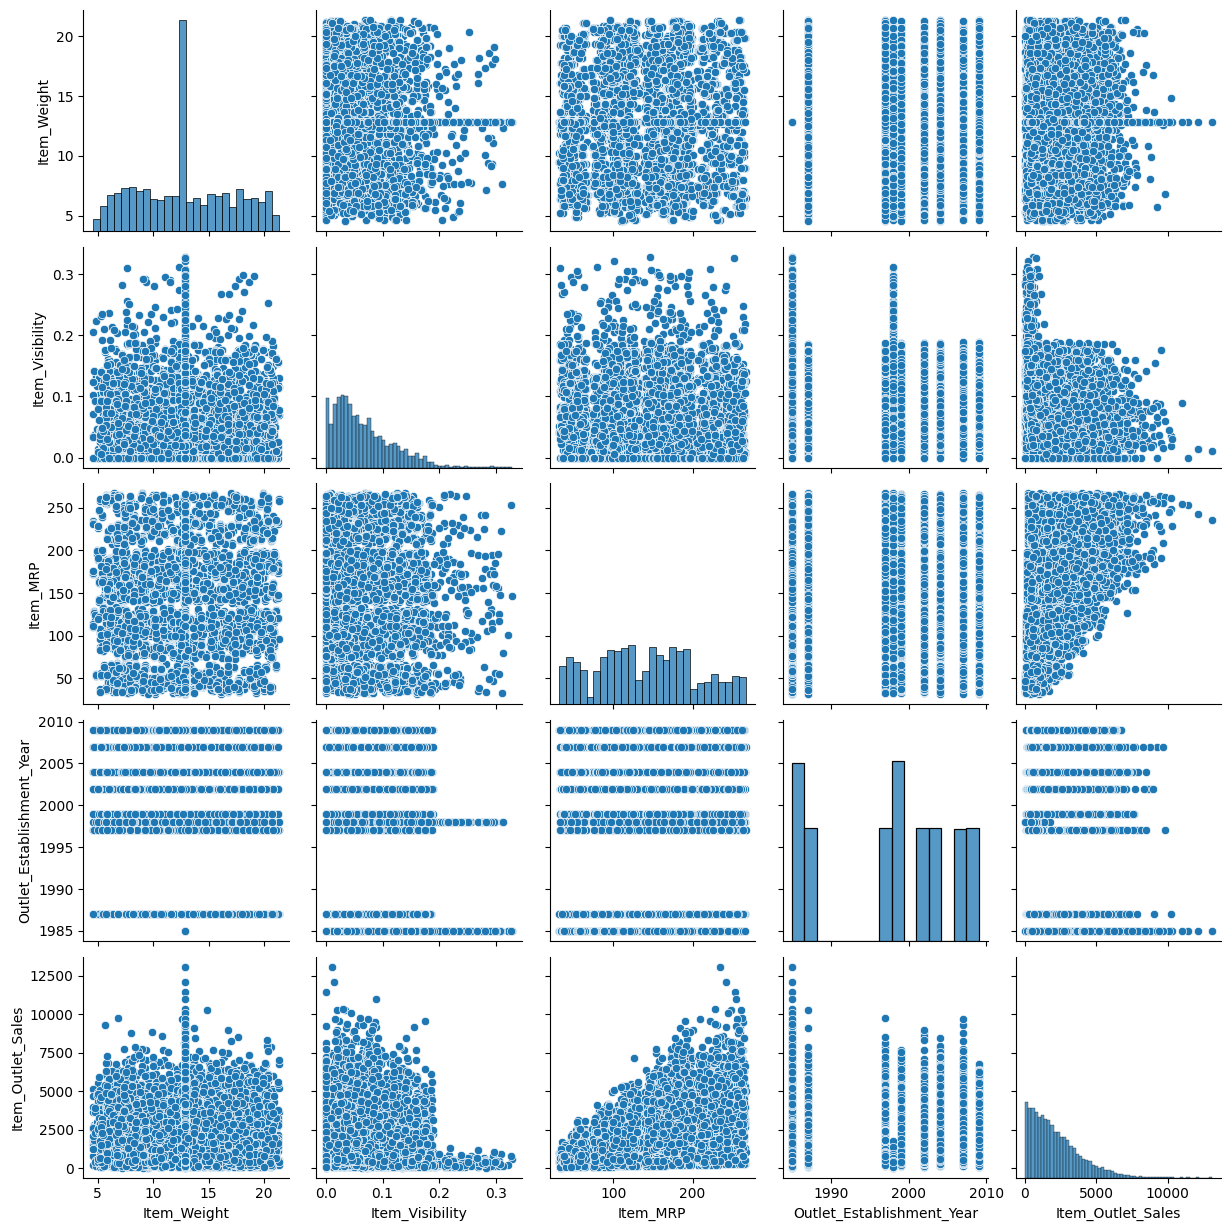

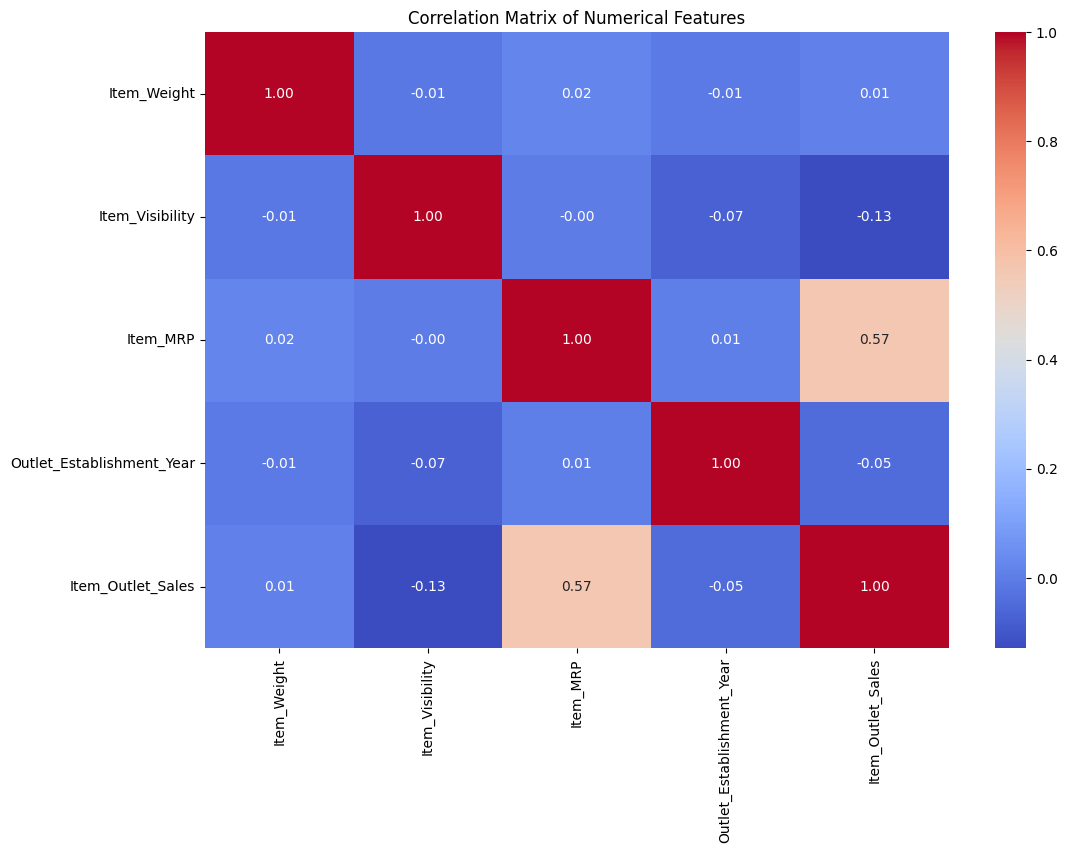

In [ ]:
# prompt: Using seaborn libarary plot pair plot and corrlation matrix on neumeric data and visualize the matrix using heat map

import matplotlib.pyplot as plt
import numpy as np
# Select numerical features
numerical_data = big_mart_data.select_dtypes(include=np.number)

# Pair plot
sns.pairplot(numerical_data)
plt.show()

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# prompt: Fit every possible regression algorithm to predict the outlet sales

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'big_mart_data' is already loaded and preprocessed as in your previous code

# Prepare the data
X = big_mart_data.drop(columns=['Item_Outlet_Sales'])  # Features
y = big_mart_data['Item_Outlet_Sales']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR() # May take a long time
}


results = {}
for name, model in models.items():
    try:
      print(f"Training {name}...")
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      results[name] = {"MSE": mse, "R-squared": r2}
    except Exception as e:
      print(f"Error training {name}: {e}")
      results[name] = {"MSE": np.nan, "R-squared": np.nan} # Store NaN for errors


# Print the results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training Support Vector Regression...

Model Performance:
Linear Regression:
  MSE: 1622299.6085
  R-squared: 0.4031
Ridge Regression:
  MSE: 1399008.6989
  R-squared: 0.4853
Lasso Regression:
  MSE: 1148633.6117
  R-squared: 0.5774
Decision Tree:
  MSE: 2065192.5986
  R-squared: 0.2402
Random Forest:
  MSE: 1198868.0057
  R-squared: 0.5589
Gradient Boosting:
  MSE: 1078715.6539
  R-squared: 0.6031
Support Vector Regression:
  MSE: 2790341.4118
  R-squared: -0.0266


In [ ]:
# prompt: interpret the result one by one

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ... (rest of your existing code) ...

# Assuming 'big_mart_data' is already loaded and preprocessed as in your previous code

# ... (your existing code for data preparation and model training)

# The code provided trains several regression models, evaluates their performance
# on the test set using MSE and R-squared, and prints the results.

# Example interpretation of a single model result:
# If the output for Linear Regression is:

# Linear Regression:
#   MSE: 1234567.8901
#   R-squared: 0.5000

# This means that the Linear Regression model, when trained on the provided data and
# evaluated on the held-out test data, had a mean squared error of approximately 1,234,567.89
# and an R-squared value of 0.5.

# Lower MSE indicates better performance (lower prediction error).
# R-squared values range from 0 to 1, with 1 indicating a perfect fit.
# An R-squared of 0.5 suggests that the model explains 50% of the variance in the target
# variable.  You would compare these MSE and R^2 values across different models
# to select the best-performing one for your needs.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Assuming 'big_mart_data' is preloaded and preprocessed
X = big_mart_data.drop(columns=['Item_Outlet_Sales'])
y = big_mart_data['Item_Outlet_Sales']

# One-hot encode categorical features
X = pd.get_dummies(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Tuned Random Forest": best_rf,
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Voting Ensemble": VotingRegressor([
        ('rf', best_rf),
        ('gb', GradientBoostingRegressor(random_state=42)),
        ('xgb', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "R-squared": r2}
    except Exception as e:
        print(f"Error training {name}: {e}")
        results[name] = {"MSE": np.nan, "R-squared": np.nan}

# Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.993e+07, tolerance: 2.017e+06
  model = cd_fast.enet_coordinate_descent(


Training Decision Tree...
Training Tuned Random Forest...
Training Gradient Boosting...
Training Support Vector Regression...
Training XGBoost...
Training Voting Ensemble...

Model Performance:
Linear Regression:
  MSE: 1622616.2100
  R-squared: 0.4030
Ridge Regression:
  MSE: 1615213.7433
  R-squared: 0.4057
Lasso Regression:
  MSE: 1558763.2651
  R-squared: 0.4265
Decision Tree:
  MSE: 2029038.6295
  R-squared: 0.2535
Tuned Random Forest:
  MSE: 1055914.5804
  R-squared: 0.6115
Gradient Boosting:
  MSE: 1081844.0206
  R-squared: 0.6020
Support Vector Regression:
  MSE: 2797497.9533
  R-squared: -0.0293
XGBoost:
  MSE: 1166041.3064
  R-squared: 0.5710
Voting Ensemble:
  MSE: 1083354.5521
  R-squared: 0.6014
